## 1. Identifikation von Ausreißern

### 1.1 Z-Score-Methode

Der Z-Score misst, wie viele Standardabweichungen ein Wert vom Mittelwert entfernt ist. Werte mit |Z| > 3 gelten oft als Ausreißer.

In [1]:
!pip install scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Beispiel-Daten
np.random.seed(42)
data = {'Werte': np.append(np.random.normal(50, 10, 100), [200, 210])}
df = pd.DataFrame(data)

# Z-Score berechnen
z_scores = zscore(df['Werte'])
df['Z-Score'] = z_scores

# Ausreißer identifizieren
outliers = df[np.abs(z_scores) > 3]
print("Ausreißer:")
print(outliers)

Ausreißer:
     Werte   Z-Score
100  200.0  6.317932
101  210.0  6.744880


### 1.2 Interquartilsabstand (IQR)

Der IQR ist der Bereich zwischen dem ersten Quartil (Q1) und dem dritten Quartil (Q3). Werte außerhalb von [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] gelten als Ausreißer.

In [3]:
# Quartile berechnen
Q1 = df['Werte'].quantile(0.25)
Q3 = df['Werte'].quantile(0.75)
IQR = Q3 - Q1

# Grenzen für Ausreißer
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ausreißer identifizieren
outliers = df[(df['Werte'] < lower_bound) | (df['Werte'] > upper_bound)]
print("Ausreißer:")
print(outliers)

Ausreißer:
          Werte   Z-Score
74    23.802549 -1.204787
100  200.000000  6.317932
101  210.000000  6.744880


## 2. Umgang mit Ausreißern

### 2.1 Entfernen von Ausreißern

Ausreißer können einfach aus dem Datensatz entfernt werden:

In [4]:
# Daten ohne Ausreißer
cleaned_df = df[(df['Werte'] >= lower_bound) & (df['Werte'] <= upper_bound)]
print("Bereinigte Daten:")
print(cleaned_df)

Bereinigte Daten:
        Werte   Z-Score
0   54.967142  0.125780
1   48.617357 -0.145323
2   56.476885  0.190238
3   65.230299  0.563964
4   47.658466 -0.186262
..        ...       ...
95  35.364851 -0.711136
96  52.961203  0.040137
97  52.610553  0.025166
98  50.051135 -0.084108
99  47.654129 -0.186448

[99 rows x 2 columns]


### 2.2 Ersetzen von Ausreißern

Statt die Ausreißer zu entfernen, können diese durch einen anderen Wert ersetzt werden, z. B. das Mittel oder das Median.

In [5]:
# Ausreißer durch Median ersetzen
median_value = df['Werte'].median()
df['Werte_bereinigt'] = df['Werte'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
print(df)

          Werte   Z-Score  Werte_bereinigt
0     54.967142  0.125780        54.967142
1     48.617357 -0.145323        48.617357
2     56.476885  0.190238        56.476885
3     65.230299  0.563964        65.230299
4     47.658466 -0.186262        47.658466
..          ...       ...              ...
97    52.610553  0.025166        52.610553
98    50.051135 -0.084108        50.051135
99    47.654129 -0.186448        47.654129
100  200.000000  6.317932        49.061708
101  210.000000  6.744880        49.061708

[102 rows x 3 columns]


## 3. Visualisierung von Ausreißern

Visualisierungen können helfen, Ausreißer besser zu erkennen.

### 3.1 Boxplot

Ein Boxplot zeigt die Verteilung der Daten und hebt Ausreißer hervor.

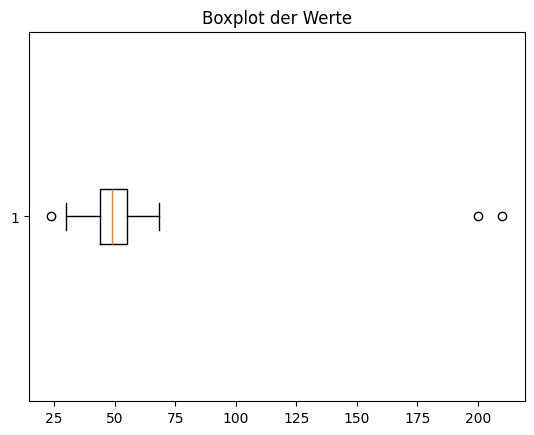

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(df['Werte'], vert=False)
plt.title("Boxplot der Werte")
plt.show()

### 3.2 Histogramm

Ein Histogramm zeigt die Verteilung der Daten.

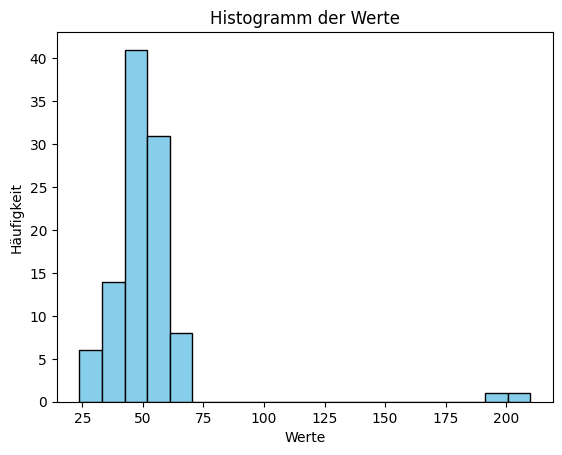

In [7]:
plt.hist(df['Werte'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogramm der Werte")
plt.xlabel("Werte")
plt.ylabel("Häufigkeit")
plt.show()